## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 3s 13ms/step - loss: 2.2562 - accuracy: 0.1606 - val_loss: 2.2018 - val_accuracy: 0.2005
Epoch 2/500
196/196 [==============================] - 2s 12ms/step - loss: 2.1686 - accuracy: 0.2226 - val_loss: 2.1364 - val_accuracy: 0.2436
Epoch 3/500
196/196 [==============================] - 3s 13ms/step - loss: 2.1112 - accuracy: 0.2584 - val_loss: 2.0869 - val_accuracy: 0.2695
Epoch 4/500
196/196 [==============================] - 2s 12ms/step - loss: 2.0667 - accuracy: 0.2775 - val_loss: 2.0481 - val_accuracy: 0.2822
Epoch 5/500
196/196 [==============================] - 3s 13ms/step - loss: 2.0308 - accuracy: 0.2914 - val_loss: 2.0170 - val_accuracy: 0.2924
Epoch 6/500
196/196 [==============================] - 2s 13ms/step - loss: 2.0013 - accuracy: 0.3003 - val_loss: 1.9890 - val_accuracy: 0.3059
Epoch 7/500
196/196 [==============================] - 3s 14ms/step - loss: 1.9763 - accuracy: 0.3104 - val_loss: 1.9659 - val_accuracy:

196/196 [==============================] - 3s 16ms/step - loss: 1.6546 - accuracy: 0.4222 - val_loss: 1.6622 - val_accuracy: 0.4223
Epoch 58/500
196/196 [==============================] - 3s 15ms/step - loss: 1.6515 - accuracy: 0.4243 - val_loss: 1.6594 - val_accuracy: 0.4201
Epoch 59/500
196/196 [==============================] - 3s 17ms/step - loss: 1.6483 - accuracy: 0.4247 - val_loss: 1.6562 - val_accuracy: 0.4222
Epoch 60/500
196/196 [==============================] - 3s 17ms/step - loss: 1.6454 - accuracy: 0.4253 - val_loss: 1.6542 - val_accuracy: 0.4213
Epoch 61/500
196/196 [==============================] - 4s 18ms/step - loss: 1.6423 - accuracy: 0.4268 - val_loss: 1.6561 - val_accuracy: 0.4231
Epoch 62/500
196/196 [==============================] - 3s 17ms/step - loss: 1.6395 - accuracy: 0.4274 - val_loss: 1.6458 - val_accuracy: 0.4256
Epoch 63/500
196/196 [==============================] - 3s 16ms/step - loss: 1.6363 - accuracy: 0.4292 - val_loss: 1.6446 - val_accuracy: 0.427

196/196 [==============================] - 3s 17ms/step - loss: 1.5188 - accuracy: 0.4701 - val_loss: 1.5440 - val_accuracy: 0.4626
Epoch 114/500
196/196 [==============================] - 3s 16ms/step - loss: 1.5170 - accuracy: 0.4711 - val_loss: 1.5425 - val_accuracy: 0.4594
Epoch 115/500
196/196 [==============================] - 3s 16ms/step - loss: 1.5150 - accuracy: 0.4711 - val_loss: 1.5437 - val_accuracy: 0.4602
Epoch 116/500
196/196 [==============================] - 3s 16ms/step - loss: 1.5129 - accuracy: 0.4722 - val_loss: 1.5416 - val_accuracy: 0.4568
Epoch 117/500
196/196 [==============================] - 3s 16ms/step - loss: 1.5112 - accuracy: 0.4726 - val_loss: 1.5432 - val_accuracy: 0.4555
Epoch 118/500
196/196 [==============================] - 3s 17ms/step - loss: 1.5095 - accuracy: 0.4734 - val_loss: 1.5382 - val_accuracy: 0.4647
Epoch 119/500
196/196 [==============================] - 3s 17ms/step - loss: 1.5073 - accuracy: 0.4741 - val_loss: 1.5348 - val_accuracy:

196/196 [==============================] - 4s 18ms/step - loss: 1.4234 - accuracy: 0.5048 - val_loss: 1.4733 - val_accuracy: 0.4821
Epoch 170/500
196/196 [==============================] - 4s 18ms/step - loss: 1.4219 - accuracy: 0.5047 - val_loss: 1.4743 - val_accuracy: 0.4802
Epoch 171/500
196/196 [==============================] - 3s 17ms/step - loss: 1.4206 - accuracy: 0.5057 - val_loss: 1.4892 - val_accuracy: 0.4721
Epoch 172/500
196/196 [==============================] - 3s 18ms/step - loss: 1.4187 - accuracy: 0.5062 - val_loss: 1.4777 - val_accuracy: 0.4768
Epoch 173/500
196/196 [==============================] - 4s 18ms/step - loss: 1.4178 - accuracy: 0.5069 - val_loss: 1.4695 - val_accuracy: 0.4838
Epoch 174/500
196/196 [==============================] - 3s 18ms/step - loss: 1.4155 - accuracy: 0.5066 - val_loss: 1.4686 - val_accuracy: 0.4852
Epoch 175/500
196/196 [==============================] - 3s 17ms/step - loss: 1.4144 - accuracy: 0.5080 - val_loss: 1.4686 - val_accuracy:

196/196 [==============================] - 3s 16ms/step - loss: 1.3428 - accuracy: 0.5310 - val_loss: 1.4267 - val_accuracy: 0.5008
Epoch 226/500
196/196 [==============================] - 3s 16ms/step - loss: 1.3416 - accuracy: 0.5320 - val_loss: 1.4218 - val_accuracy: 0.4956
Epoch 227/500
196/196 [==============================] - 3s 16ms/step - loss: 1.3401 - accuracy: 0.5317 - val_loss: 1.4258 - val_accuracy: 0.4936
Epoch 228/500
196/196 [==============================] - 3s 16ms/step - loss: 1.3391 - accuracy: 0.5326 - val_loss: 1.4250 - val_accuracy: 0.5016
Epoch 229/500
196/196 [==============================] - 3s 16ms/step - loss: 1.3375 - accuracy: 0.5332 - val_loss: 1.4161 - val_accuracy: 0.5002
Epoch 230/500
196/196 [==============================] - 3s 16ms/step - loss: 1.3360 - accuracy: 0.5332 - val_loss: 1.4230 - val_accuracy: 0.4977
Epoch 231/500
196/196 [==============================] - 3s 16ms/step - loss: 1.3349 - accuracy: 0.5333 - val_loss: 1.4189 - val_accuracy:

196/196 [==============================] - 3s 16ms/step - loss: 1.2722 - accuracy: 0.5549 - val_loss: 1.3853 - val_accuracy: 0.5119
Epoch 282/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2716 - accuracy: 0.5561 - val_loss: 1.4063 - val_accuracy: 0.5027
Epoch 283/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2705 - accuracy: 0.5563 - val_loss: 1.3952 - val_accuracy: 0.5072
Epoch 284/500
196/196 [==============================] - 3s 15ms/step - loss: 1.2690 - accuracy: 0.5572 - val_loss: 1.3860 - val_accuracy: 0.5071
Epoch 285/500
196/196 [==============================] - 3s 15ms/step - loss: 1.2668 - accuracy: 0.5576 - val_loss: 1.4108 - val_accuracy: 0.5040
Epoch 286/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2661 - accuracy: 0.5588 - val_loss: 1.4078 - val_accuracy: 0.5019
Epoch 287/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2646 - accuracy: 0.5597 - val_loss: 1.4034 - val_accuracy:

Epoch 337/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2087 - accuracy: 0.5776 - val_loss: 1.3644 - val_accuracy: 0.5216
Epoch 338/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2067 - accuracy: 0.5781 - val_loss: 1.3740 - val_accuracy: 0.5146ccura
Epoch 339/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2077 - accuracy: 0.5779 - val_loss: 1.3604 - val_accuracy: 0.5206
Epoch 340/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2051 - accuracy: 0.5795 - val_loss: 1.3820 - val_accuracy: 0.5124
Epoch 341/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2039 - accuracy: 0.5810 - val_loss: 1.3697 - val_accuracy: 0.5154
Epoch 342/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2026 - accuracy: 0.5799 - val_loss: 1.3893 - val_accuracy: 0.5086
Epoch 343/500
196/196 [==============================] - 3s 16ms/step - loss: 1.2019 - accuracy: 0.5803 - val_loss: 1.3

196/196 [==============================] - 3s 16ms/step - loss: 1.1482 - accuracy: 0.5979 - val_loss: 1.3712 - val_accuracy: 0.5209
Epoch 394/500
196/196 [==============================] - 3s 16ms/step - loss: 1.1475 - accuracy: 0.6001 - val_loss: 1.3589 - val_accuracy: 0.5212
Epoch 395/500
196/196 [==============================] - 3s 16ms/step - loss: 1.1456 - accuracy: 0.6004 - val_loss: 1.3513 - val_accuracy: 0.5211
Epoch 396/500
196/196 [==============================] - 3s 16ms/step - loss: 1.1437 - accuracy: 0.6017 - val_loss: 1.3672 - val_accuracy: 0.5176
Epoch 397/500
196/196 [==============================] - 3s 16ms/step - loss: 1.1450 - accuracy: 0.6001 - val_loss: 1.3710 - val_accuracy: 0.5195
Epoch 398/500
196/196 [==============================] - 3s 16ms/step - loss: 1.1443 - accuracy: 0.5999 - val_loss: 1.4012 - val_accuracy: 0.5127
Epoch 399/500
196/196 [==============================] - 3s 16ms/step - loss: 1.1431 - accuracy: 0.6005 - val_loss: 1.3581 - val_accuracy:

196/196 [==============================] - 3s 17ms/step - loss: 1.0914 - accuracy: 0.6194 - val_loss: 1.3402 - val_accuracy: 0.5280
Epoch 450/500
196/196 [==============================] - 3s 17ms/step - loss: 1.0895 - accuracy: 0.6209 - val_loss: 1.3551 - val_accuracy: 0.5274
Epoch 451/500
196/196 [==============================] - 3s 16ms/step - loss: 1.0874 - accuracy: 0.6195 - val_loss: 1.3794 - val_accuracy: 0.5168
Epoch 452/500
196/196 [==============================] - 3s 16ms/step - loss: 1.0881 - accuracy: 0.6192 - val_loss: 1.3517 - val_accuracy: 0.5291
Epoch 453/500
196/196 [==============================] - 3s 16ms/step - loss: 1.0861 - accuracy: 0.6227 - val_loss: 1.3503 - val_accuracy: 0.5255
Epoch 454/500
196/196 [==============================] - 3s 16ms/step - loss: 1.0841 - accuracy: 0.6223 - val_loss: 1.3883 - val_accuracy: 0.5134
Epoch 455/500
196/196 [==============================] - 3s 16ms/step - loss: 1.0840 - accuracy: 0.6222 - val_loss: 1.3434 - val_accuracy:

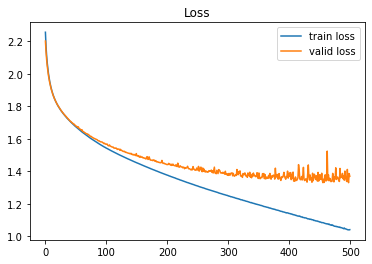

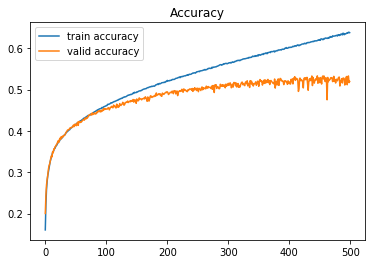

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()